Lab ML for Data Science: Part I

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 1 Loading the Data, Preprocessing, Initial Data Analysis

The first step will consist of **downloading the dataset and converting it into numerical tables (e.g. numpy, arrays)**.
In practice, raw data is rarely directly usable as input to machine learning algorithms. In particular, there may be substantial heterogeneity between the different input features. Some features may be physical measurements, monetary measurements, while others may be category indicators or even non-numerical data such as text or images. Hence, a **preliminary filtering** of what is interesting for the analysis we would like to conduct is desirable.

In the context of the UCI wholesale dataset, one may, for example, want to base anomaly and cluster predictions on numerical data (annual spending per category) and drop meta-data such as Channel and the Region indicators or reserve it for an ulterior use. Once such a preliminary step has been taken, we have a standard dataset of size $N × d$ where $N$ is the number of instances (wholesale customers), $d$ is the number of spending categories, and each value in the table can be expressed in monetary unit.

To verify the range and distribution of these values, we can **generate some basic statistical visualizations** of the data. This includes **histograms** showing for each category the distribution of spendings, or **scatter plots** showing the correlation between different product categories. A common observation from such basic statistical analysis is that the distributions are heavy tailed, with many instances having rather small spendings, whereas a few may have spendings one or two orders of magnitude above. 

Any anomaly detection algorithm would systematically highlight those high spenders as anomalous and not make a distinction between spending little and not spending at all.
To address this issue, it can be useful to apply some **nonlinear transformation** to the data, for example, applying the log function to the features so that the distribution becomes compressed for large values and expanded for small values.

$x → log(x + θ)$

Here, we add a positive offset $θ$ in the logarithm so that zero spending $(x = 0)$ does not get mapped to $−∞$. You may experiment with different offsets, such as $θ = 1, θ = 10$ or $θ = 100$. To verify the effect of the transformation, you can **recompute the histograms and scatter plots** in transformed space and check visually whether the transformation had the desired result, e.g. whether the distribution look Gaussian-distributed.

# Loading and understanding the Data

In [2]:
data_pd = pd.read_csv('Wholesale customers data.csv')
data_pd.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


It seems like the dataset has no missing values.

In [4]:
data_pd.duplicated().sum()

0

There do not appear to be any duplicate entries.

In [5]:
data_pd.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


For now, we only want to analyse the numerical data. So we won't look at the metadata such as Channel and Region as suggested in the task.

In [6]:
data_scatter = data_pd.iloc[:,2:]

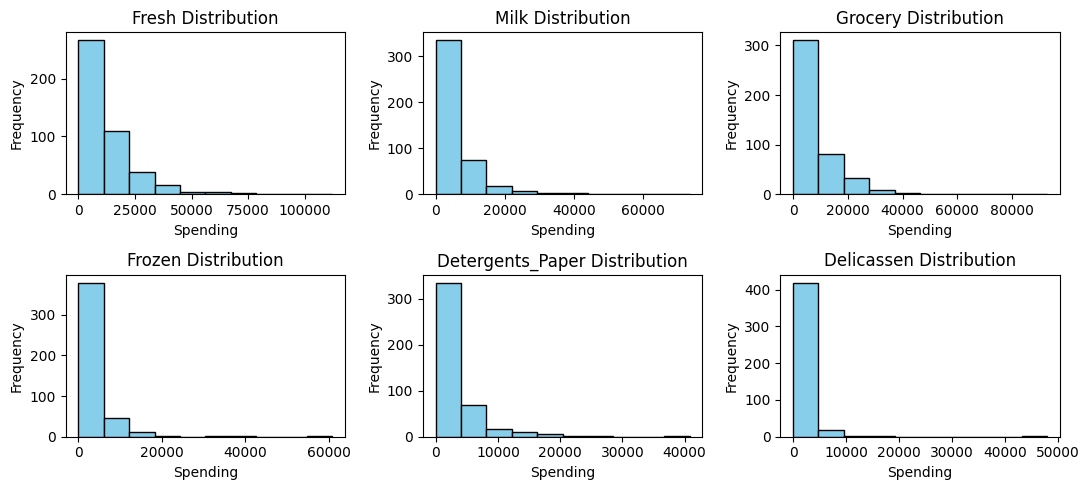

In [7]:
#data_scatter.plot.hist(alpha=0.5)
#Plot histograms for each product category
plt.figure(figsize=(11, 5))

for i, column in enumerate(data_scatter.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(data_scatter[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(column + ' Distribution')
    plt.xlabel('Spending')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

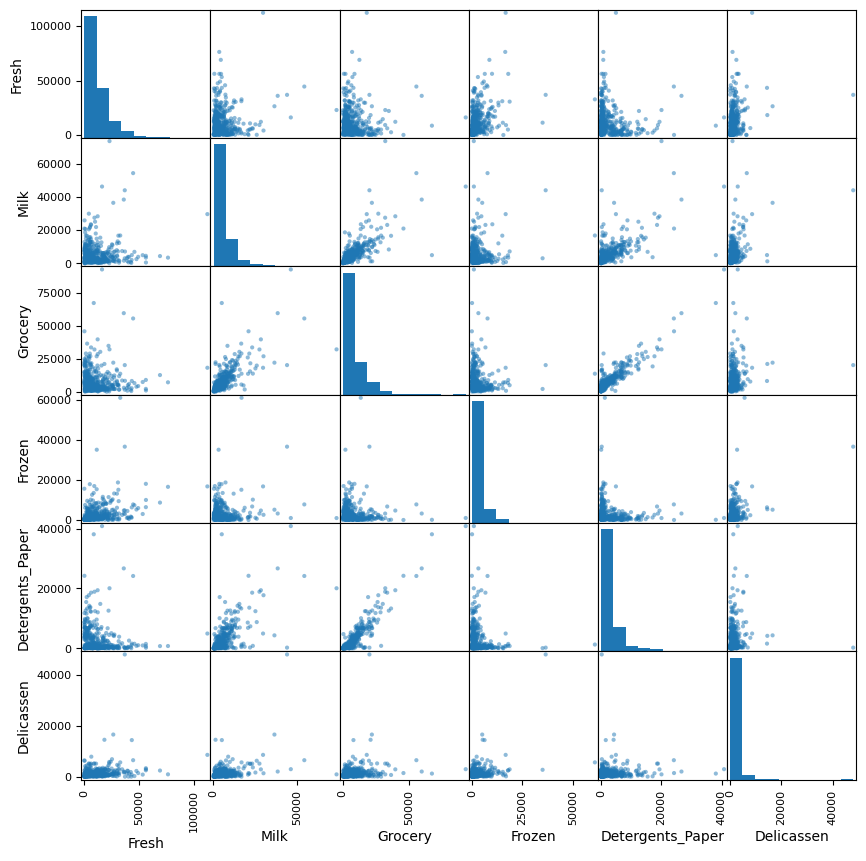

In [8]:
pd.plotting.scatter_matrix(data_scatter, figsize=(10, 10))
plt.show()

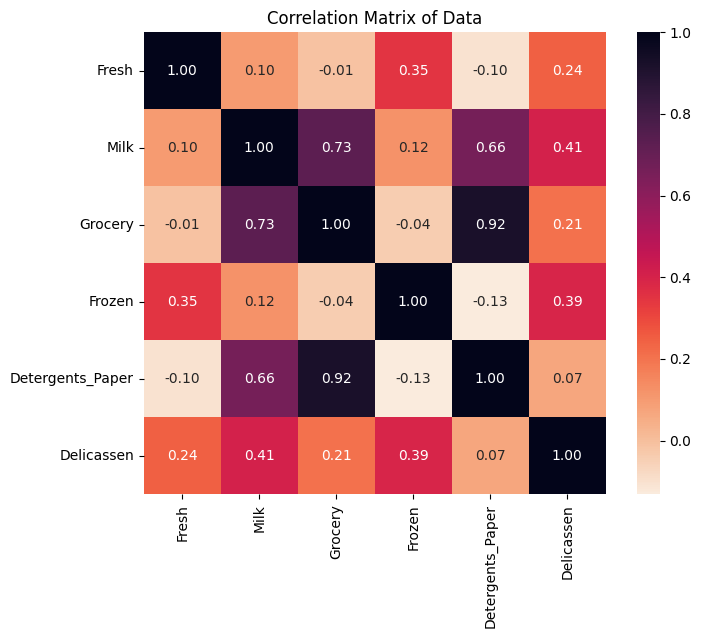

In [9]:
correlation_matrix = data_scatter.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', fmt=".2f", square=True)
plt.title('Correlation Matrix of Data')
plt.show()

Through the basic statistical visualizations we could see that the distributions are heavy tailed, with many instances having rather small spendings, whereas a few may have spendings one or two orders of magnitude above. Also there are some instances in Frozen, Detergents_Paper and Delicassen that have huge spendings. 

It also seems like Milk and Grocery could be correclating and even Milk and Detergents_Paper. More likely though there seems to be a high correclation between Grocery and Detergents_Paper.

Other possible ways to look at the data:

In [10]:
data_pd.groupby(["Region"]).count()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,77,77,77,77,77,77,77
2,47,47,47,47,47,47,47
3,316,316,316,316,316,316,316


In [11]:
data_pd.groupby(["Channel"]).count()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,298,298,298,298,298,298,298
2,142,142,142,142,142,142,142


# Preprocessing with log-transformation


In [12]:
offset = 1e-10
#offset = 1
#offset = 10
#offset = 100
data_log = data_pd.apply(lambda x: np.log(x + offset))
data_log_scatter = data_log.iloc[:,2:]

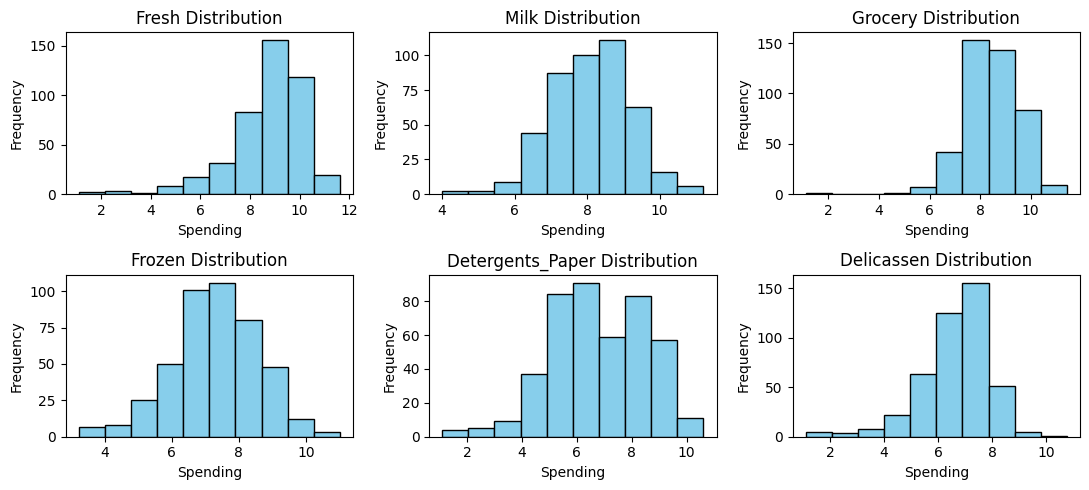

In [13]:
#data_log_scatter.plot.hist(alpha=0.5)
#Plot histograms for each product category
plt.figure(figsize=(11, 5))

for i, column in enumerate(data_log_scatter.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(data_log_scatter[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(column + ' Distribution')
    plt.xlabel('Spending')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

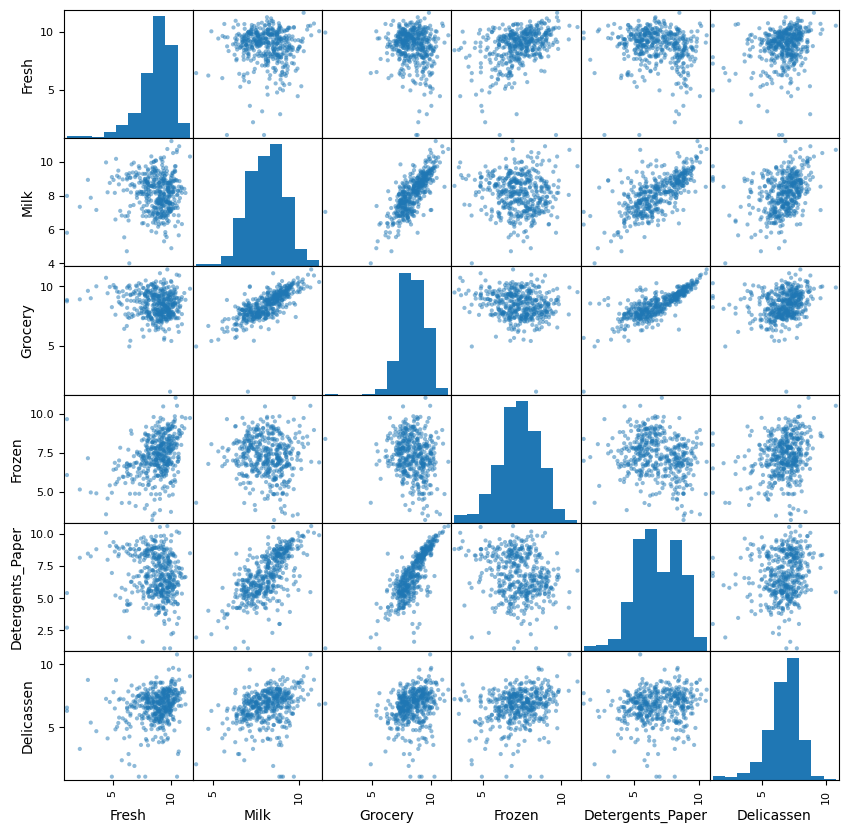

In [15]:
pd.plotting.scatter_matrix(data_log_scatter, figsize=(10, 10))
plt.show()

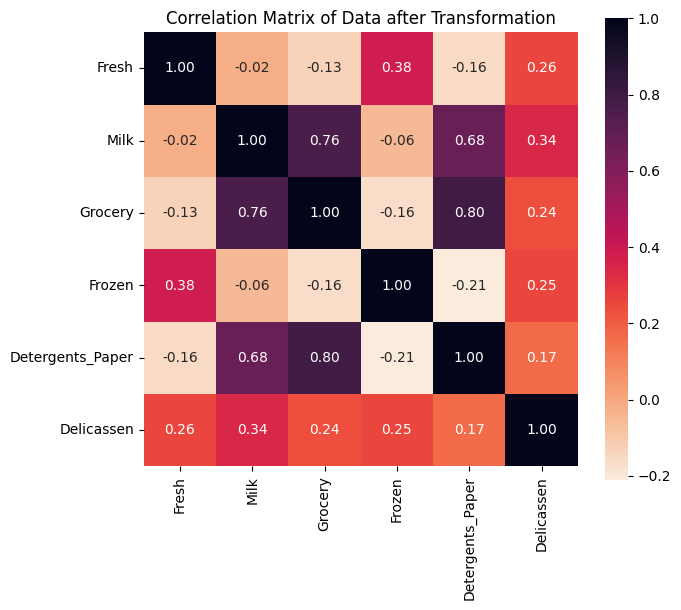

In [16]:
correlation_matrix = data_log_scatter.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', fmt=".2f", square=True)
plt.title('Correlation Matrix of Data after Transformation')
plt.show()

C:\Users\Sprzetowo\miniconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


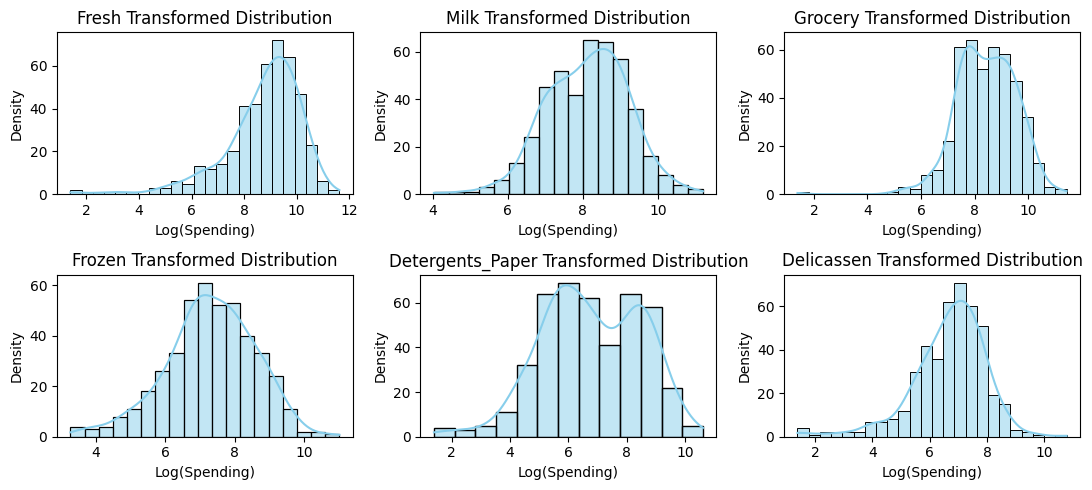

In [17]:
from sklearn.preprocessing import FunctionTransformer

# Apply log transformation to the data
transformer = FunctionTransformer(np.log1p, validate=True)
log_transformed_data = transformer.transform(data_scatter)
log_transformed_df = pd.DataFrame(log_transformed_data, columns=data_scatter.columns)

plt.figure(figsize=(11, 5))

for i, column in enumerate(log_transformed_df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(log_transformed_df[column], color='skyblue', kde=True)
    plt.title(column + ' Transformed Distribution')
    plt.xlabel('Log(Spending)')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# 2 Detecting Anomalies
We now focus on a question of interest, specifically, whether there are anomalous instances in the given data. A basic form of anomaly detection is to verify for each data point whether it has neighbors. A simple measure of anomaly can then be given by the **distance (or squared distance) to the nearest neighbor**. For example, given some test point with index j in the dataset, one can get its outlier score by performing a minimum over the $N − 1$ remaining points in the data, i.e.:

$
z_{jk} = ||x_j − x_k||^2
$

$
y_j = \displaystyle\min_{k \neq j} z_{jk}
$

With such anomaly scores, data points can now be ranked from most to least anomalous. For example, one may now be able to extract a top-10 list of the most anomalous instances in the dataset, and print for these 10 instances their recorded spending across categories.

In [18]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(data_log_scatter)
distances, indices = nbrs.kneighbors(data_log_scatter)
anomaly_scores = np.mean(distances[:, 1:], axis=1)

top_anomalous_indices = np.argsort(anomaly_scores)[::-1][:10]

# Print the top 10 most anomalous instances along with their recorded spending
print("Top 10 Most Anomalous Instances:")
for i, idx in enumerate(top_anomalous_indices):
    print(f"Instance {i+1}:")
    print(log_transformed_data[idx])  # Print the log-transformed spending
    print("-----------------------------------------")

Top 10 Most Anomalous Instances:
Instance 1:
[1.38629436 5.81114099 8.85680336 9.65515439 2.77258872 6.31173481]
-----------------------------------------
Instance 2:
[9.92324116 7.03702761 1.38629436 8.39117635 1.38629436 6.88346259]
-----------------------------------------
Instance 3:
[6.43454652 4.02535169 4.92725369 4.33073334 2.07944154 2.19722458]
-----------------------------------------
Instance 4:
[10.51967269  8.87528713  9.01845321  8.00503334  3.04452244  1.38629436]
-----------------------------------------
Instance 5:
[1.38629436 7.9796813  8.74081663 6.08904488 5.41164605 6.56526497]
-----------------------------------------
Instance 6:
[7.57916797 6.79346613 8.56159278 7.23273314 1.79175947 7.19218206]
-----------------------------------------
Instance 7:
[4.94875989 9.08794672 8.24905227 4.96284463 6.96885038 1.38629436]
-----------------------------------------
Instance 8:
[7.7993434  8.98757175 9.1921764  8.74353163 8.14902387 1.38629436]
---------------------------

## 2.1 Robust anomaly models
In practice, however, Eq. (1) may not identify top outliers in a way that is sufficiently reproducible. Imagine, for example, a point $x_j$ whose nearest neighbor, call it $x_i$ is at a distance of 1 but the second nearest neighbor is at a distance of 10. If the nearest point $x_i$ was not in the dataset (e.g. due to slight variations in the data collection process), the outlierness score of $x_j$ would have changed drastically. An efficient way of addressing this problem is to reconsider the notion of outlierness by considering a point to be an outlier based on multiple neighbors. In other words, a point may still be an outlier even if (by accident) some other point in the data shares roughly the same values.

Such a redefined notion of outlierness can be implemented by replacing the hard minimum in the original equation by a soft minimum, i.e.:

$y_j$ = soft $\displaystyle\min_{k \neq j} z_{jk}$

with:

soft $\displaystyle\min_{k \neq j} z_{jk} = - \frac{1}{\gamma} \log({\frac{1}{N-1}} \displaystyle\sum_{k \neq j} exp(- \gamma z_{jk}))$

As a side note, the softmin can be interpreted as a generalized F-mean with $F(t) = exp(−γt)$. The output of such function is also related to the log-likelihood prediced by a kernel density estimator of the rest of the data (see e.g. [2]).



In [19]:
# Calculate pairwise Euclidean distances between data points
num_instances = log_transformed_data.shape[0]
distances = np.zeros((num_instances, num_instances))

for i in range(num_instances):
    for j in range(num_instances):
        distances[i, j] = np.linalg.norm(log_transformed_data[i] - log_transformed_data[j])

# Set diagonal elements to infinity to exclude self-distance
np.fill_diagonal(distances, np.inf)

# Define the soft minimum function
def soft_min(scores, gamma):
    return -1 / gamma * np.log(np.mean(np.exp(-gamma * scores)))

# Compute anomaly scores for each data point using soft minimum
gamma = 1.0  # Adjust the gamma parameter as needed
anomaly_scores = np.zeros(num_instances)

for i in range(num_instances):
    anomaly_scores[i] = soft_min(distances[i], gamma)

# Display the anomaly scores
print("Anomaly Scores (Soft Minimum):")
for i, score in enumerate(anomaly_scores):
    print(f"Data point {i}: {score}")

Anomaly Scores (Soft Minimum):
Data point 0: 3.1914104730695834
Data point 1: 2.6238878116560307
Data point 2: 3.2132990978173868
Data point 3: 2.7276373520350776
Data point 4: 3.014209912807321
Data point 5: 2.702822258720174
Data point 6: 2.8662645312626243
Data point 7: 2.6322060728811896
Data point 8: 2.7570506531272105
Data point 9: 2.863300160640143
Data point 10: 3.0352021608192827
Data point 11: 2.601140966032773
Data point 12: 3.5256511778491753
Data point 13: 3.1373000929146584
Data point 14: 3.3414623665797074
Data point 15: 2.947633248140543
Data point 16: 3.584323623793148
Data point 17: 3.140189902300049
Data point 18: 2.7792218537518685
Data point 19: 2.809474875560163
Data point 20: 2.6683342660690155
Data point 21: 2.6206832971949257
Data point 22: 3.4223345763971076
Data point 23: 4.418874019982351
Data point 24: 3.2724509102955253
Data point 25: 4.1228394271432185
Data point 26: 2.5190620083591324
Data point 27: 3.178563845457288
Data point 28: 3.456921555269675
Data

## 2.2 Selecting a suitable parameter γ

To verify the gain in terms of reproducibility one can gain from using the softmin approach to detect anomalies, one can apply the bootstrap method in statistics. Bootstrap consists of simulating multiple variants of the same datasets by randomly sampling instances (with repetition) from the original dataset. The anomaly scores can then be computed for each variant of the dataset, and for each instance, one can characterize its anomalousness by two values, its average and its spread. In other words, the anomaly of an instance is modeled, not by a single value $y_j$ , but by a random variable $y_j$ of mean $µ_j$ and spread $σ_j$ .

A large value for the parameter γ of the softmin anomaly model of Eq. (2) may produce stark differences between the $µ_j$ ’s of anomalous and non-anomalous instances, but also large spreads $σ_j$ ’s within each instance. Conversely, a small value of γ can reduce these spreads, but also at the cost of reducing differences between instances. In practice, a neither too small nor too large value of γ is likely to achieve the maximum separability between anomalous and non-anomalous instances.

To find a suitable parameter γ, you may for example plot for each instance its anomaly average and spread, repeat the plot for different parameters γ, and then chose the parameter γ that produces the best separability on a visual level. Even better, you may formalize this visual intuition into some evaluation metric based on which you can derive an optimal parameter γ. Note that once you have selected a parameter γ, you can recompute a single anomaly model with this parameter γ on the whole data. This single model can then be used for the analyses in the next section.

In [20]:
# Define the soft minimum function
def soft_min(scores, gamma):
    return -1 / gamma * np.log(np.mean(np.exp(-gamma * scores)))

# Define a function to compute anomaly scores for a given dataset and gamma
def compute_anomaly_scores(data, gamma):
    num_instances = data.shape[0]
    distances = np.zeros((num_instances, num_instances))

    for i in range(num_instances):
        for j in range(num_instances):
            distances[i, j] = np.linalg.norm(data[i] - data[j])

    np.fill_diagonal(distances, np.inf)

    anomaly_scores = np.zeros(num_instances)

    for i in range(num_instances):
        anomaly_scores[i] = soft_min(distances[i], gamma)

    return anomaly_scores

# Define a function to simulate multiple variants of the dataset using bootstrap
def simulate_variants(data, num_variants, variant_size):
    variants = []

    for _ in range(num_variants):
        indices = np.random.choice(data.shape[0], variant_size, replace=True)
        variant = data[indices]
        variants.append(variant)

    return variants

# Define a function to compute anomaly averages and spreads for each instance
def compute_anomaly_stats(variants, gamma):
    anomaly_stats = []

    for variant in variants:
        anomaly_scores = compute_anomaly_scores(variant, gamma)
        anomaly_mean = np.mean(anomaly_scores)
        anomaly_std = np.std(anomaly_scores)
        anomaly_stats.append((anomaly_mean, anomaly_std))

    return anomaly_stats

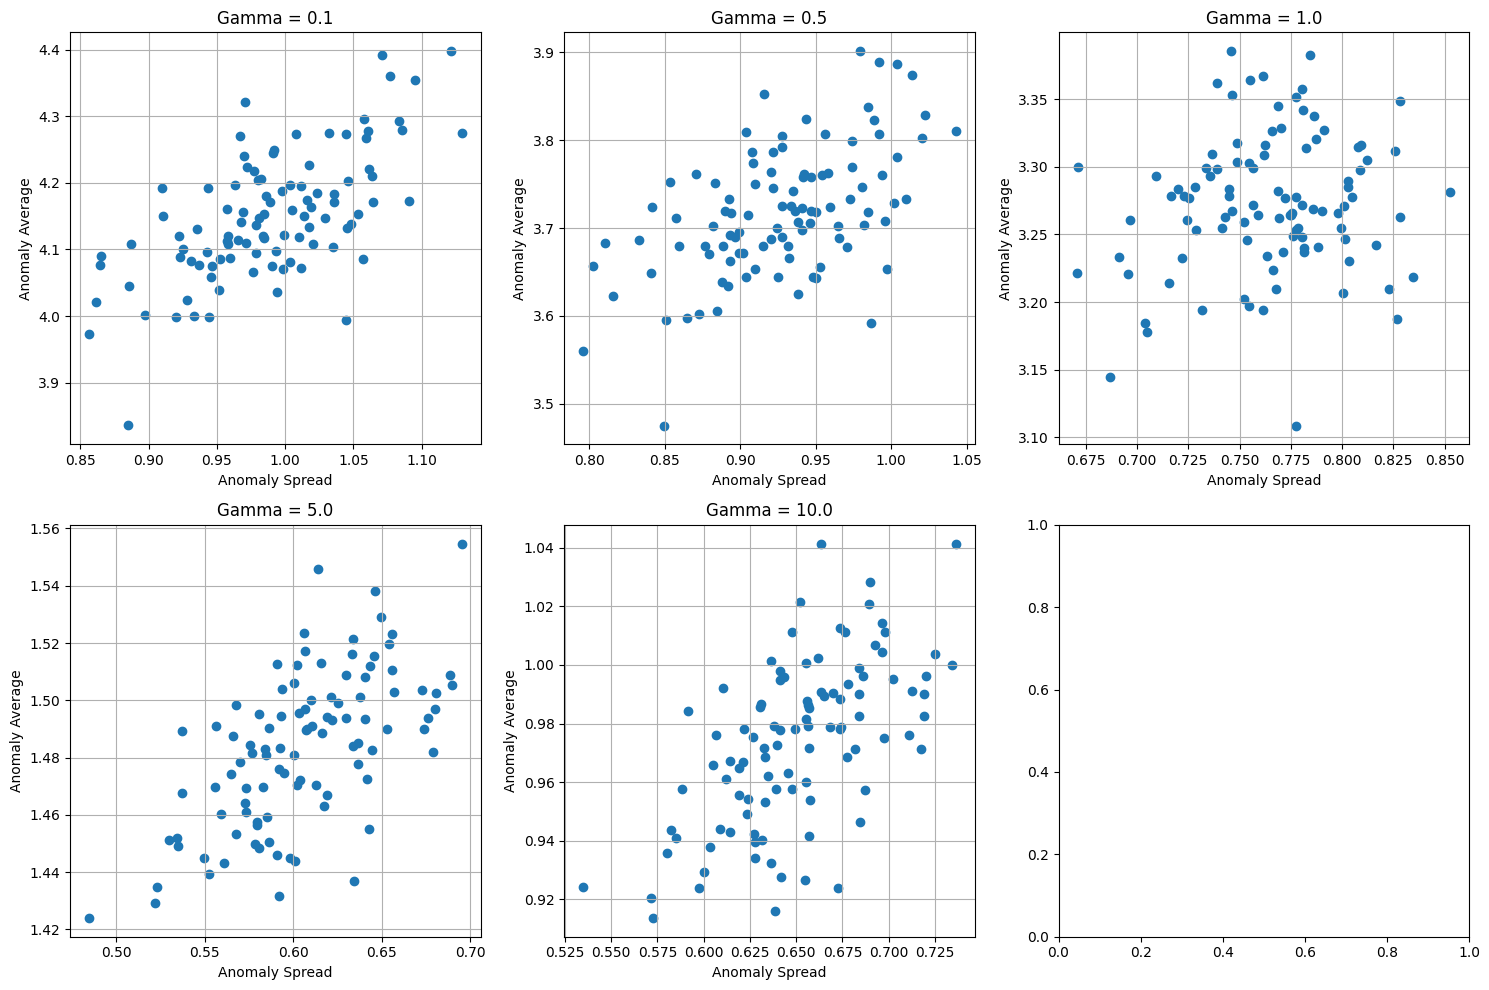

In [21]:
def plot_anomaly_stats(gamma, anomaly_stats, ax):
    anomaly_means = [stat[0] for stat in anomaly_stats]
    anomaly_stds = [stat[1] for stat in anomaly_stats]

    ax.scatter(anomaly_stds, anomaly_means)
    ax.set_xlabel('Anomaly Spread')
    ax.set_ylabel('Anomaly Average')
    ax.set_title(f'Gamma = {gamma}')
    ax.grid(True)

# Parameters
num_variants = 100  # Number of variants to simulate
variant_size = log_transformed_data.shape[0]  # Size of each variant (same as original dataset)
gammas = [0.1, 0.5, 1.0, 5.0, 10.0]  # Different values of gamma to try

# Simulate variants of the dataset using bootstrap
variants = simulate_variants(log_transformed_data, num_variants, variant_size)

# Compute anomaly averages and spreads for each variant and different values of gamma
anomaly_stats = {}
for gamma in gammas:
    anomaly_stats[gamma] = compute_anomaly_stats(variants, gamma)

# Plot anomaly averages and spreads for different values of gamma
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, gamma in enumerate(gammas):
    row = i // 3
    col = i % 3
    plot_anomaly_stats(gamma, anomaly_stats[gamma], axs[row, col])

plt.tight_layout()
plt.show()